Entropic Regularization of Optimal Transport
============================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_matlab/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

This numerical tours exposes the general methodology of regularizing the
optimal transport (OT) linear program using entropy. This allows to
derive fast computation algorithm based on iterative projections
according to a Kulback-Leiber divergence.
$$ \DeclareMathOperator{\KL}{KL}
\newcommand{\KLdiv}[2]{\KL\pa{#1 | #2}}
\newcommand{\KLproj}{\text{Proj}^{\tiny\KL}}
\renewcommand{\epsilon}{\varepsilon}
\def\ones{\mathbb{I}} $$

In [244]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import pylab as pyl
import timeit

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Entropic Regularization of Optimal Transport
--------------------------------------------
We consider two input histograms $a,b \in \Si_n$, where we denote the simplex in $\RR^n$
$$ \Si_n \eqdef \enscond{ a \in \RR_+^n }{ \sum_i a_i = 1 }.  $$
We consider the following discrete regularized transport
$$  W_\epsilon(a,b) \eqdef \umin{P \in U(a,b)} \dotp{C}{P} - \epsilon E(P).  $$
where the polytope of coupling is defined as
$$ U(a,b) \eqdef \enscond{P \in (\RR^+)^{n \times m}}{ P \ones_m = a, P^\top \ones_n = b },  $$
where $\ones_n \eqdef (1,\ldots,1)^\top \in \RR^n $,
and for $P \in \RR_+^{n \times m}$, we define its entropy as
$$ E(P) \eqdef -\sum_{i,j} P_{i,j} ( \log(P_{i,j}) - 1). $$


When $\epsilon=0$ one recovers the classical (discrete) optimal transport.
We refer to the monograph [Villani](#biblio) for more details about OT.
The idea of regularizing transport to allows for faster computation is
introduced in [Cuturi](#biblio).


Here the matrix $C \in (\RR^+)^{n \times m} $ defines the ground cost, i.e.
$C_{i,j}$ is the cost of moving mass from a bin indexed by $i$ to a bin indexed by $j$.


The regularized transportation problem can be re-written as a projection
$$ W_\epsilon(a,b) = \epsilon \umin{P \in U(a,b)} \KLdiv{P}{K}
	\qwhereq
	K_{i,j} \eqdef e^{ -\frac{C_{i,j}}{\epsilon} }  $$
of the Gibbs kernel $K$ according to the Kullback-Leibler divergence.
The Kullback-Leibler divergence between $P, K \in \RR_+^{n \times m}$ is
$$ \KLdiv{P}{K} \eqdef \sum_{i,j} P_{i,j} \pa{ \log\pa{ \frac{P_{i,j}}{K_{i,j}} } - 1}. $$


This interpretation of regularized transport as a KL projection and its numerical
applications are detailed in [BenamouEtAl](#biblio).


Given a convex set $\Cc \subset \RR^N$, the projection according to the Kullback-Leiber divergence is defined as
$$ \KLproj_\Cc(\xi) = \uargmin{ \pi \in \Cc } \KLdiv{\pi}{\xi}. $$

Iterative Bregman Projection Algorithm
--------------------------------------
Given affine constraint sets $ (\Cc_1,\Cc_2) $, we aim at computing
$$   \KLproj_\Cc(K) \qwhereq \Cc = \Cc_1 \cap \Cc_2 $$
(this description can of course be extended to more than 2 sets). 

This can be achieved, starting by $P_0=K$, by iterating $\forall \ell \geq 0$, 
$$ P_{2\ell+1} =  \KLproj_{\Cc_1}(P_{2\ell}) 
 \qandq 
  P_{2\ell+2} =  \KLproj_{\Cc_2}(P_{2\ell+1}). $$

One can indeed show that $P_\ell \rightarrow \KLproj_\Cc(K)$.
We refer to [BauschkeLewis](#biblio) for more details about this
algorithm and its extension to compute the projection on the intersection of
convex sets (Dikstra algorithm).

Sinkhorn's Algorithm
-----------------------------------------------------------------------

A fundamental remark is that the optimality condition of the entropic regularized problem shows that the optimal coupling $P_\epsilon$ necessarily has the form 
$$P_\epsilon = \diag{u} K \diag{v}$$
where the Gibbs kernel is defined as
$$K \eqdef e^{-\frac{C}{\epsilon}}.$$

One thus needs to find two positive scaling vectors $u \in \RR_+^n$ and $v \in \RR_+^m$ such that the two following equality holds
$$P \ones  = u \odot (K v) = a 
\qandq
P^\top \ones  = v \odot (K^\top u) = b.$$

Sinkhorn's algorithm alternate between the resolution of these two equations, and reads
$$u \longleftarrow \frac{a}{K v} \qandq v \longleftarrow \frac{b}{K^\top u}.$$
This algorithm was shown to converge to a solution of the entropic regularized problem by [Sinkhorn](#biblio).

Transport Between Point Clouds
------------------------------
We first test the method for two input measures that are uniform measures
(i.e. constant histograms) supported on two point clouds
(that do not necessarily have the same size).


We thus first load two points clouds $x=(x_i)_{i=1}^{n}, y=(y_i)_{i=1}^{m}, $
where $x_i, y_i \in \RR^2$.


Number of points in each cloud, $N=(n,m)$.

In [245]:
n = 400 # multiple of 5
m = 400
N = [n, m]

Dimension of the clouds.

In [246]:
d = 2

Point cloud $x$, of $n$ points inside a square.

In [247]:
#x = np.random.rand(2,N[0])-.5

theta = np.random.uniform(0, 2*np.pi, n)
r = np.random.uniform(0, .2 , n)
t = np.tile(np.array([[0,0], [1, 1], [-1, 1], [1, -1], [-1, -1]]), (n // 5, 1))
x = t.T + r*np.array([np.cos(theta), np.sin(theta)])


Point cloud $y$, of $m$ points inside an anulus.

In [248]:
#theta = 2*np.pi*np.random.rand(1,N[1])
#r = .8 + .2*np.random.rand(1,N[1])
#y = np.vstack((np.cos(theta)*r,np.sin(theta)*r))

theta = np.random.uniform(0,2*np.pi, m)
r = np.random.uniform(.6, .8, m)
y = r*np.array([np.cos(theta), np.sin(theta)])

Shortcut for displaying point clouds.

In [249]:
plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=200, edgecolors="k", c=col, linewidths=2)

Display of the two clouds.

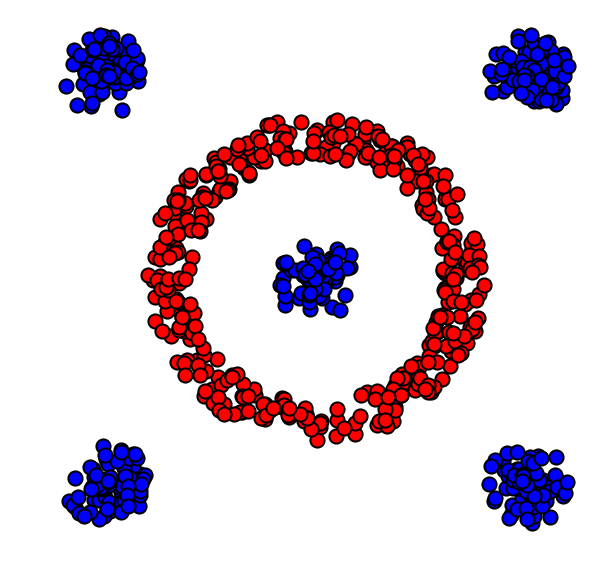

In [250]:
plt.figure(figsize=(10,10))

plotp(x, 'b')
plotp(y, 'r')

plt.axis("off")
#plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
#plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.show()

Cost matrix $C_{i,j} = \norm{x_i-y_j}^2$.

In [251]:
x2 = np.sum(x**2,0)
y2 = np.sum(y**2,0)
C = np.tile(y2,(N[0],1)) + np.tile(x2[:,np.newaxis],(1,N[1])) - 2*np.dot(np.transpose(x),y)

Target histograms $(a,b)$, here uniform histograms.

In [252]:
a = np.ones(N[0])/N[0]
b = np.ones(N[1])/N[1]

Regularization strength $\epsilon>0$.

In [253]:
epsilon = .005;

Gibbs Kernel $K$.

In [254]:
K = np.exp(-C/epsilon)

Initialization of $v=\ones_{m}$ ($u$ does not need to be
initialized).

In [255]:
v = np.ones(N[1])

One sinkhorn iterations.

In [256]:
u = a / (np.dot(K,v))
v = b / (np.dot(np.transpose(K),u))

__Exercise 1__

Implement Sinkhorn algorithm.
Display the evolution of the constraints satisfaction errors
$$ \norm{ P \ones - a }_1 \qandq \norm{ P^\top \ones - b } $$
(you need to think about how to compute these residuals from $(u,v)$ alone).
isplay the violation of constraint error in log-plot.

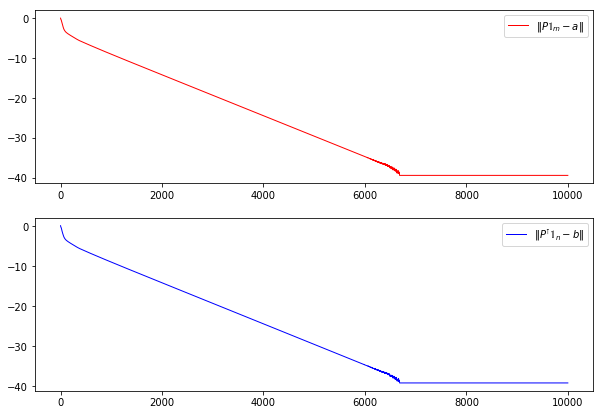

In [257]:
nb_iter = 10000
errors_a = []
errors_b = []
for _ in range(nb_iter):
    u = a / (np.dot(K,v))
    errors_b.append(np.linalg.norm(v * (np.dot(K.T,u)) - b, 1))
    v = b / (np.dot(K.T,u))
    errors_a.append(np.linalg.norm(u * np.dot(K,v) - a, 1))



plt.figure(figsize = (10,7))
plt.style.use("seaborn-bright")
plt.subplot(2, 1, 1)
plt.plot(np.log(errors_a), label = "$\Vert P \mathbb{1}_m - a\Vert$", c = 'r', lw=1)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.log(errors_b), label = "$\Vert P^\intercal \mathbb{1}_n - b\Vert$", c = 'b', lw=1)
plt.legend()



Compute the final matrix $P$.

In [258]:
P = np.dot(np.dot(np.diag(u),K),np.diag(v))

Display it.

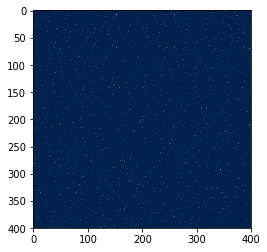

In [259]:
plt.imshow(P, cmap = 'cividis');

__Exercise 2__

Display the regularized transport solution for various values of $\epsilon$.
For a too small value of $\epsilon$, what do you observe ?

Execution time for epsilon = 1 : 0.3066578920042957 sec
Execution time for epsilon = 0.1 : 0.31789975900028367 sec
Execution time for epsilon = 0.01 : 0.29551050099689746 sec
Execution time for epsilon = 0.005 : 1.5731429090010352 sec


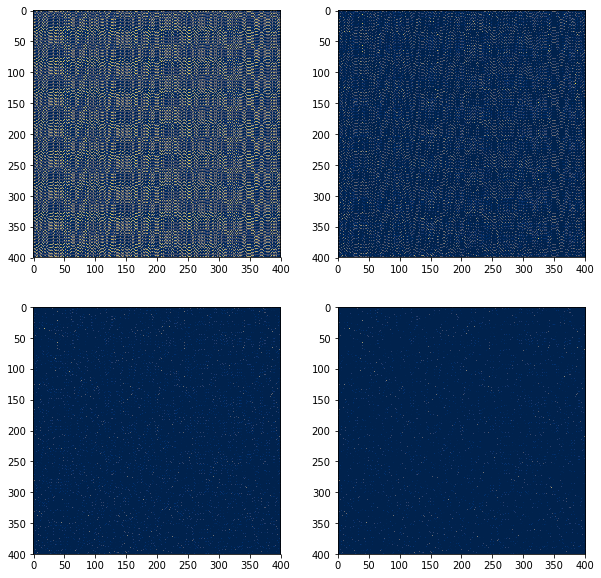

In [260]:
plt.figure(figsize = (10,10))
reglist = [1,.1,.01,.005]
nb_iter = 5000
for k in range(len(reglist)):
    start = timeit.default_timer()
    epsilon = reglist[k]
    K = np.exp(-C/epsilon)
    v = np.ones(N[1])
    for i in range(nb_iter):
        u = a / (np.dot(K,v))
        v = b / (np.dot(K.T,u))
    P = np.dot(np.dot(np.diag(u),K),np.diag(v))
    stop = timeit.default_timer()
    print('Execution time for epsilon = '+ str(epsilon) +' : ' + str(stop - start) + ' sec')
    plt.subplot(2,2,k+1)
    plt.imshow(P, cmap = 'cividis')


Compute the obtained optimal $P$.

In [261]:
P = np.dot(np.dot(np.diag(u),K),np.diag(v))

Keep only the highest entries of the coupling matrix, and use them to
draw a map between the two clouds.
First we draw "strong" connexions, i.e. linkds $(i,j)$ corresponding to
large values of $P_{i,j}$.
We then draw weaker connexions.

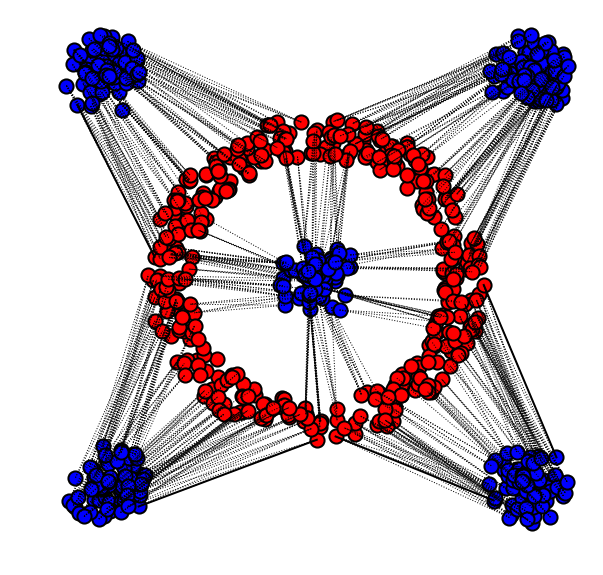

In [262]:
plt.figure(figsize=(10,10))

plotp(x, 'b')
plotp(y, 'r')

A = P * (P > np.max(P)*.7)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k',lw = 2)

A = P * (P > np.max(P)*.2)
i,j = np.where(A != 0)
plt.plot([x[0,i],y[0,j]],[x[1,i],y[1,j]],'k:',lw = 1)

plt.axis("off")
#plt.xlim(np.min(y[0,:])-.1,np.max(y[0,:])+.1)
#plt.ylim(np.min(y[1,:])-.1,np.max(y[1,:])+.1)

plt.show()

Execution time : 6.485123650003516 sec


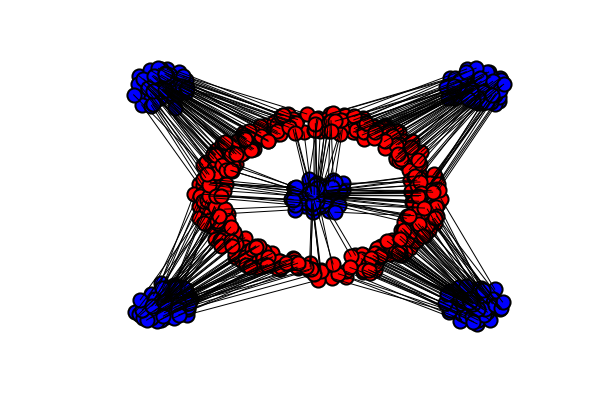

In [263]:
import cvxpy as cp

myplot = lambda x,y,ms,col: plt.scatter(x,y, s=ms*20, edgecolors="k", c=col, linewidths=2)

a = np.ones([n,1])/n
b = a

P_ = cp.Variable((n,m))
u = np.ones((m,1))
v = np.ones((n,1))
U = [0 <= P_, cp.matmul(P_,u)== a, cp.matmul(P_.T,v)== b]

start = timeit.default_timer()
objective = cp.Minimize( cp.sum(cp.multiply(P_,C)) )
prob = cp.Problem(objective, U)
result = prob.solve(solver = cp.ECOS)
stop = timeit.default_timer()
print('Execution time : ' + str(stop - start) + ' sec')

I,J = np.nonzero(P_.value>1e-5)
plt.figure(figsize = (10,7))
plt.axis('off')
for k in range(len(I)):
    h = plt.plot(np.hstack((x[0,I[k]],y[0,J[k]])),np.hstack(([x[1,I[k]], y[1,J[k]]])),'k', lw = 1)
for i in range(len(a)):
    myplot(x[0,i], x[1,i], a[i]*len(a)*10, 'b')
for j in range(len(b)):
    myplot(y[0,j], y[1,j], b[j]*len(b)*10, 'r')
plt.xlim(np.min(y[0,:])-1,np.max(y[0,:])+1)
plt.ylim(np.min(y[1,:])-1,np.max(y[1,:])+1)
plt.show()

In [264]:
cost = np.sum(P*C)
cost_ = np.sum(P_.value * C)
print("Sinkhorn cost :", cost)
print("Exact cost : ", cost_)

# Correctly classified
c = np.sum([int(np.argmax(P[i]) == np.argmax(P_.value[i])) for i in range(n)])
print("Correctly classified : ", c)

Sinkhorn cost : 0.5662361340707331
Exact cost :  0.5628374189530883
Correctly classified :  201


Transport Between Histograms
----------------------------
We now consider a different setup, where the histogram values
$a,b$ are not uniform, but the measures are defined on a uniform grid
$x_i=y_i=i/n$. They are thue often refered to as "histograms".


Size $n$ of the histograms.

In [265]:
import cv2

img = cv2.imread('data/entropic_regularization/brain_baseline.jpg')
img_modified = cv2.imread('data/entropic_regularization/brain_modified.jpg')

hist = cv2.calcHist([img],[0],None,[256],[0,256])
b = (hist/np.sum(hist)).flatten()
hist_modified = cv2.calcHist([img_modified],[0],None,[256],[0,256])
a = (hist_modified/np.sum(hist_modified)).flatten()

In [266]:
N = 256

We use here a 1-D square Euclidean metric.

In [267]:
t = np.arange(0,N)

Define the histogram $a,b$ as translated Gaussians.

In [269]:
#Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
#normalize = lambda p: p/np.sum(p)

#sigma = .06;
#a = Gaussian(.25,sigma)
#b = Gaussian(.8,sigma)

Add some minimal mass and normalize.

In [472]:
#vmin = .02;
#a = normalize( a+np.max(a)*vmin)
#b = normalize( b+np.max(b)*vmin)

Display the histograms.

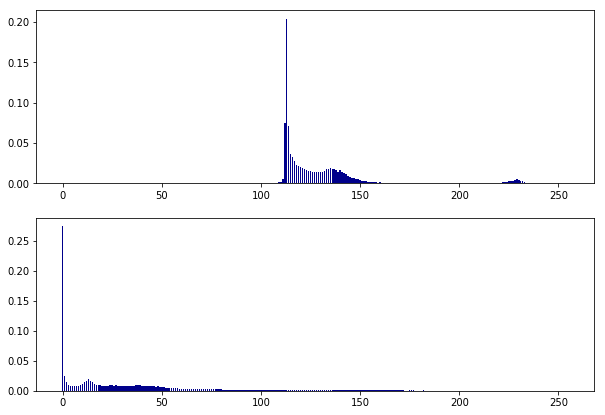

In [270]:
plt.figure(figsize = (10,7))

plt.subplot(2, 1, 1)
plt.bar(t, a, color = "darkblue")
plt.subplot(2, 1, 2)
plt.bar(t, b, color = "darkblue")

plt.show()

Regularization strength $\ga$.

In [271]:
epsilon = 0.0005

The Gibbs kernel is a Gaussian convolution,
$$ K_{i,j} \eqdef e^{ -(i/N-j/N)^2/\epsilon }. $$

In [272]:
[Y,X] = np.meshgrid(t,t)
K = np.exp(-(X/N-Y/N)**2/epsilon)

Initialization of $v=\ones_{N}$.

In [273]:
v = np.ones(N)

One sinkhorn iteration.

In [513]:
u = a / (np.dot(K,v))
v = b / (np.dot(np.transpose(K),u))

__Exercise 3__

Implement Sinkhorn algorithm.
Display the evolution of the constraints satisfaction errors
$ \norm{ P \ones - a }_1, \norm{ P^\top \ones - b }_1$. You need to think how to compute it from $(u,v)$.
Display the violation of constraint error in log-plot.

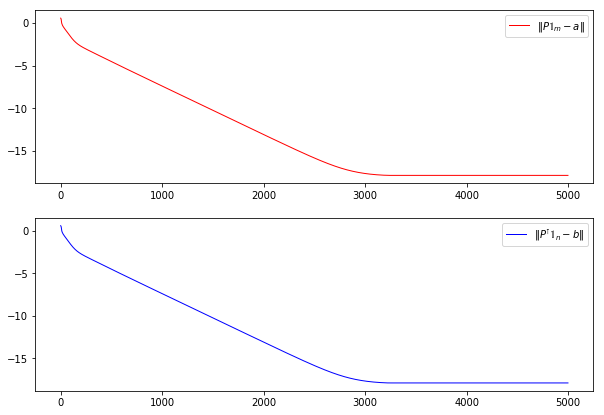

In [274]:
nb_iter = 5000
errors_a = []
errors_b = []
for _ in range(nb_iter):
    u = a / (np.dot(K,v))
    errors_b.append(np.linalg.norm(v * (np.dot(K.T,u)) - b, 1))
    v = b / (np.dot(K.T,u))
    errors_a.append(np.linalg.norm(u * np.dot(K,v) - a, 1))

plt.figure(figsize = (10,7))
plt.style.use("seaborn-bright")

plt.subplot(2, 1, 1)
plt.plot(np.log(errors_a), label = "$\Vert P \mathbb{1}_m - a\Vert$", c = 'r', lw=1)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(np.log(errors_b), label = "$\Vert P^\intercal \mathbb{1}_n - b\Vert$", c = 'b', lw=1)
plt.legend()




Display the coupling. Use a log domain plot to better vizualize it.

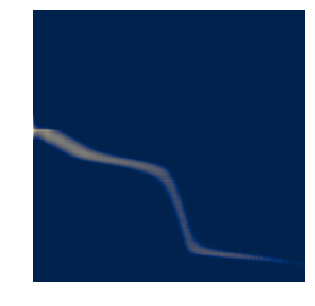

In [275]:
P = np.dot(np.dot(np.diag(u),K),np.diag(v))
plt.figure(figsize=(5,5))
plt.imshow(np.log(P+1e-5), cmap = "cividis")
plt.axis('off');

One can compute an approximation of the transport plan
between the two measure by computing the so-called barycentric projection map
$$ t_i \in [0,1] \longmapsto s_j \eqdef \frac{\sum_{j} P_{i,j} t_j }{ \sum_{j} P_{i,j} }
   =  \frac{ [u \odot K(v \odot t)]_j }{ a_i }. $$
where $\odot$ and $\frac{\cdot}{\cdot}$ are the enry-wise multiplication and division.


This computation can thus be done using only multiplication with the
kernel $K$.

In [276]:
s = np.dot(K,v*t)*u/a

Display the transport map, super-imposed over the coupling.

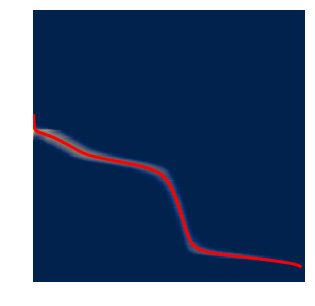

In [277]:
plt.figure(figsize = (5,5))
plt.imshow(np.log(P+1e-5), cmap = 'cividis')
plt.plot(s, t, 'r', linewidth = 3);
plt.axis('off');

True

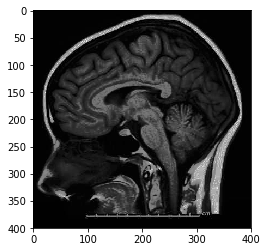

In [278]:
from PIL import Image  

def isNaN(num):
    return num != num

def transform(img, s):
    n, m, _ = img.shape
    for i in range(n):
        for j in range(m):
            pixel = img[i,j,0]
            target = s[pixel]
            if target == target: # trick to check if not NaN
                img[i,j,:] = int(target)
   
# ONLY EXECUTE ONE TIME 
transform(img_modified, s)
plt.imshow(img_modified)
cv2.imwrite('data/entropic_regularization/brain_processed.jpg', img_modified)

Using GPUs
-----------------------

We will use here [Pytorch](https://pytorch.org/) to implement Sinkhorn on the GPU. If you are running the code on Google Colab, this means you need to switch on in the preferences the use of a GPU.

In [542]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print( device )

cpu


Since CUDA uses float number on 32 bits, one needs to use a quite large value for $\epsilon$ to avoid overflow.

In [567]:
epsilon = (.06)**2
K = np.exp(-(X/N-Y/N)**2/epsilon)

Convert Sinkohrn variables and host them on GPU (if available).

In [572]:
u = torch.ones(N);
v = torch.ones(N);
K1 = torch.from_numpy(K).type(torch.FloatTensor); 
a1 = torch.from_numpy(a).type(torch.FloatTensor); 
b1 = torch.from_numpy(b).type(torch.FloatTensor); 
K1.to(device);
u.to(device); v.to(device);
a1.to(device); b1.to(device);

When using Pytorch, it is good practice to implement matrix operation as summation and dummy variables.  We show here how to implement one iteration of Sinkhorn this way.

In [573]:
u = a1 / (K1 * v[None, :]).sum(1)
v = b1 / (K1 * u[:, None]).sum(0)

In [577]:
v.type

<function Tensor.type>

__Exercise:__

Implement the full algorithm.

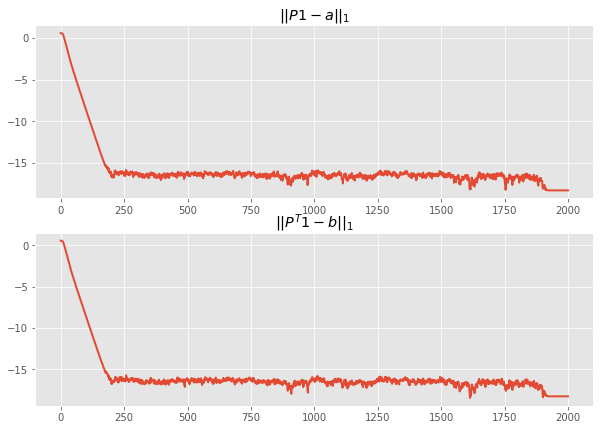

In [117]:
v = torch.ones(N)
niter = 2000
Err_p = torch.zeros(niter)
Err_q = torch.zeros(niter)
for i in range(niter):
    # sinkhorn step 1
    u = a1 / (K1 * v[None,:]).sum(1)    
    # error computation
    r = v*(K1 * u[:,None]).sum(0)
    Err_q[i] = torch.norm(r - b1, p=1)
    # sinkhorn step 2
    v = b1 / (K1 * u[:,None]).sum(0)
    s = u*(K1 * v[None,:]).sum(1)
    Err_p[i] = torch.norm(s - a1,p=1)
plt.figure(figsize = (10,7))
plt.subplot(2,1,1)
plt.title("$||P1 -a||_1$")
plt.plot(np.log(np.asarray(Err_p)), linewidth = 2)
plt.subplot(2,1,2)
plt.title("$||P^T 1 -b||_1$")
plt.plot(np.log(np.asarray(Err_q)), linewidth = 2)
plt.show()

__Exercice__
To avoid underflow, replace the matrix/vector multiplication in a log-sum-exp style, and use the log-sum-exp stabilization trick.

Wasserstein Barycenters
-----------------------
Instead of computing transport, we now turn to the problem of computing
barycenter of $R$ input measures $(a_k)_{k=1}^R$. A barycenter $b$ solves
$$ \umin{b} \sum_{k=1}^R W_\ga(a_k,b)  $$
where $\la_k$ are positive weights with $\sum_k \la_k=1$. This
follows the definition of barycenters proposed in
[AguehCarlier](#biblio).

Dimension (width of the images) $N$ of the histograms.

In [279]:
N = 80

You need to install imageio, for instance using
> conda install -c conda-forge imageio

If you need to rescale the image size, you can use
> skimage.transform.resize

In [280]:
import cv2 as cv
P = np.zeros((N,N,4))
for i in range(4):
    #p = cv.imread('data/entropic_regularization/p'+str(i+1)+'.png')
    p = cv.imread('data/entropic_regularization/ellipse_'+str(i + 1)+'.bmp')
    #p = cv.cvtColor(p, cv.COLOR_BGR2GRAY)
    #plt.imshow(p, cmap='gray')
    P[:,:,i] = p[:,:,0]

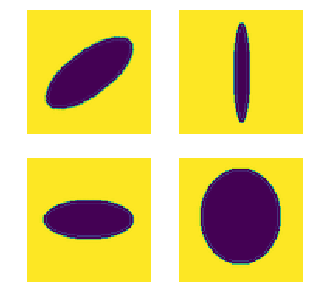

In [281]:
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(P[:,:,i])
    plt.axis('off');

In [282]:
epsilon = 0.001

In [283]:
t = np.linspace(0,1,N)
[Y,X] = np.meshgrid(t,t)
K1 = np.exp(-(X-Y)**2/epsilon)
K = lambda x: np.dot(np.dot(K1,x),K1)

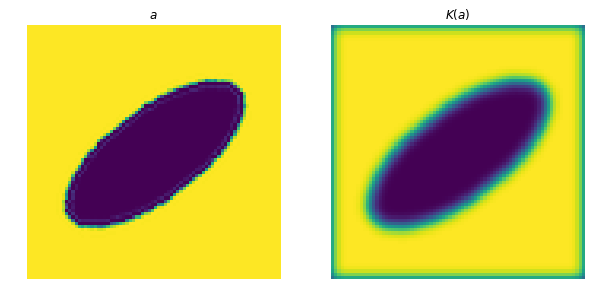

In [284]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(P[:,:,0])
plt.title("$a$")
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(K(P[:,:,0]))
plt.title("$K(a)$")
plt.axis('off');

Step  0
Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12
Step  13
Step  14
Step  15
Step  16
Step  17
Step  18
Step  19
Step  20
Step  21
Step  22
Step  23
Step  24


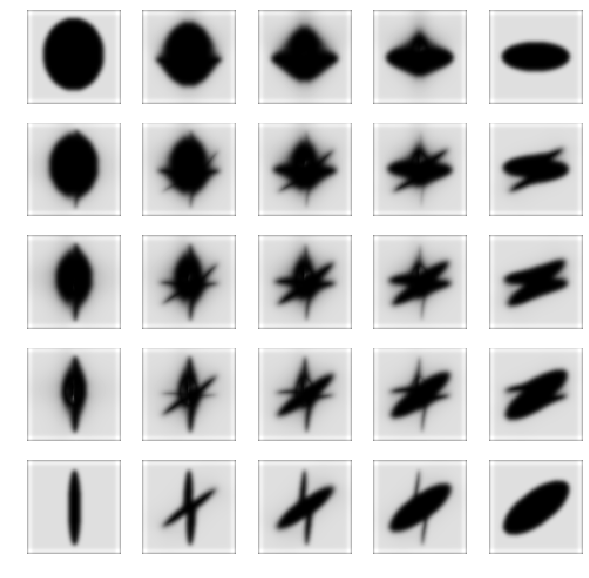

In [243]:
m = 5
[T, S] = np.meshgrid(np.linspace(0,1,m), np.linspace(0,1,m))
T = np.ravel(T,order="F")
S = np.ravel(S,order="F")
niter = 1000
plt.figure(figsize=(10,10))
for j in range(m**2):
    print("Step ", j)

    lambd = np.hstack((S[j]*T[j], (1-S[j])*T[j], S[j]*(1-T[j]), (1-S[j])*(1-T[j])))

    v = np.ones([N,N,4])
    u = np.copy(v)
    for i in range(niter):
        for k in range(4):
            u[:,:,k] = P[:,:,k]/K(v[:,:,k])
        b = np.zeros(N)
        for k in range(4):
            b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(len(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
        b = np.exp(b)
        for k in range(4):
            v[:,:,k] = b/K(u[:,:,k])

    plt.subplot(m,m,j+1)
    plt.imshow(b, c)
    plt.axis('off')



Bibliography
------------
<html><a name="biblio"></a></html>


* [Villani] C. Villani, (2009). Optimal transport: old and new, volume 338. Springer Verlag.
* [Cuturi] M. Cuturi, (2013). Sinkhorn distances: Lightspeed computation of optimal transport. In Burges, C. J. C., Bottou, L., Ghahramani, Z., and Weinberger, K. Q., editors, Proc. NIPS, pages 2292-2300.
* [AguehCarlier] M. Agueh, and G Carlier, (2011). Barycenters in the Wasserstein space. SIAM J. on Mathematical Analysis, 43(2):904-924.
* [CuturiDoucet] M. Cuturi and A. Doucet (2014). Fast computation of wasserstein barycenters. In Proc. ICML.
* [BauschkeLewis] H. H. Bauschke and A. S. Lewis. Dykstra's algorithm with Bregman projections: a convergence proof. Optimization, 48(4):409-427, 2000.
* [Sinkhorn] R. Sinkhorn. A relationship between arbitrary positive matrices and doubly stochastic matrices. Ann. Math. Statist., 35:876-879, 1964.
* [SolomonEtAl] J. Solomon, F. de Goes, G. Peyr , M. Cuturi, A. Butscher, A. Nguyen, T. Du, and L. Guibas. Convolutional Wasserstein distances: Efficient optimal transportation on geometric domains. Transaction on Graphics, Proc. SIGGRAPH, 2015.
* [BenamouEtAl] J-D. Benamou, G. Carlier, M. Cuturi, L. Nenna, G. Peyr . Iterative Bregman Projections for Regularized Transportation Problems. SIAM Journal on Scientific Computing, 37(2), pp. A1111-A1138, 2015.